# Optimistic Provide Estimator Theory

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [6]:
def cdf(series: pd.Series) -> pd.DataFrame:
    """ calculates the cumulative distribution function of the given series"""
    return pd.DataFrame.from_dict({
        series.name: np.append(series.sort_values(), series.max()),
        "cdf": np.linspace(0, 1, len(series) + 1)
    })

In [7]:
NETWORK_SIZE = 17_000
LOOKUPS = 1000
K_BUCKET_SIZE = 20

In [8]:
peer_ids = np.random.uniform(0, 2 ** 256, NETWORK_SIZE)

In [9]:
dists = []

for i in range(LOOKUPS):

    # Pick random point in the keyspace
    random_point = np.random.uniform(0, 2 ** 256)

    # Calculate distances of peer IDs to that point. Use abs due to XOR.
    distances = np.abs(peer_ids - random_point)

    # Sort the distances increasing
    distances_sorted = np.sort(distances)

    # Keep track of the K_BUCKET_SIZE closest peers
    for j in range(K_BUCKET_SIZE):
        dists += [distances_sorted[j]]

dists = np.array(dists)

In [64]:
dists = 100 * dists / 2 ** 256
dists = pd.Series(dists, name="distances")

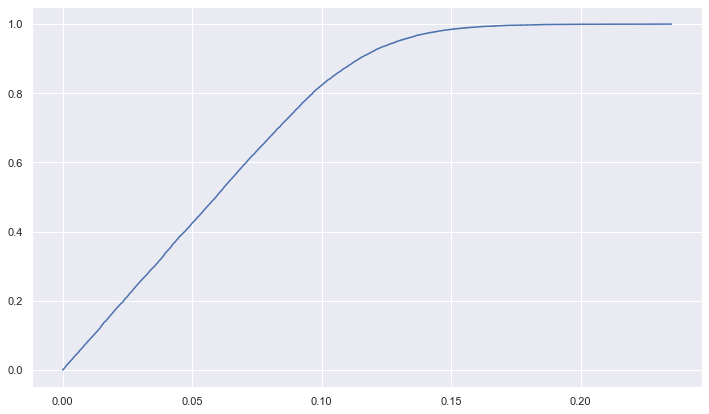

In [67]:
fig, ax = plt.subplots(figsize=[12, 7])

cdf_df = cdf(dists)
ax.step(cdf_df["distances"] * 2, cdf_df["cdf"], label=f"DHT Walk")

[]

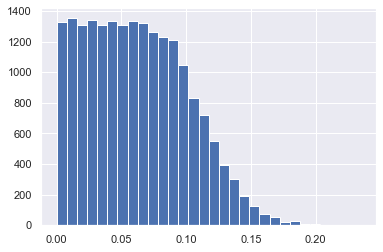

In [69]:
plt.hist(2*dists, bins=30)
plt.plot()